In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
import warnings
warnings.filterwarnings('ignore')

In [148]:
def heatmap(df_1):
    styled_df = df_1.style.background_gradient(cmap='coolwarm', vmax = 1, vmin = -1)
    return styled_df

In [149]:
def cross_corr_graph(df):
    num_of_columns = len(df.columns)
    for i in range(num_of_columns - 1):
        column_data = df.iloc[:, i]
        ax = column_data.plot(y = df.iloc[:, i].name, marker = 'o', linestyle='-', markersize=2, linewidth=0.5)
        plt.xticks(rotation=90)
        ax.xaxis.set_major_locator(MultipleLocator(base= 1))
        ax.set_xticks(range(len(df)))
        ax.set_xticklabels(df.index, rotation=90, fontsize=6)
        plt.tick_params(axis='x', labelsize=6)
        plt.title(f'График кросс-корреляции для {df.iloc[:, i].name}') 
        plt.show()

In [150]:
data = np.load('Data_First_Nikita.npz', allow_pickle=True)
data_archive = np.load('Data_First_Nikita.npz', allow_pickle=True)

In [151]:
ALL_column_names_1 = data_archive['column_names_1'] 
all_X_1 = data_archive['all_X_1']
all_Y_1 = data_archive['all_Y_1']

ALL_column_names_2 = data_archive['column_names_2_cat'] 
all_X_2 = data_archive['all_X_2']
all_Y_2 = data_archive['all_Y_2']

ALL_column_names_3 = data_archive['column_names_3_cat']
all_X_3 = data_archive['all_X_3']
all_Y_3 = data_archive['all_Y_3']

column_names_2 = data_archive['column_names_2']
x_summer_half_2 = data_archive['x_summer_half_2']
y_summer_half_2 = data_archive['y_summer_half_2']
x_winter_half_2 = data_archive['x_winter_half_2']
y_winter_half_2 = data_archive['y_winter_half_2']

column_names_3 = data_archive['column_names_3']
x_summer_half_3 = data_archive['x_summer_half_3']
y_summer_half_3 = data_archive['y_summer_half_3']
x_winter_half_3 = data_archive['x_winter_half_3']
y_winter_half_3 = data_archive['y_winter_half_3']


In [152]:
dtype = 1

In [153]:
if dtype == 1:   
    df_x = pd.DataFrame(all_X_1)
    df_y = pd.DataFrame(all_Y_1)
    y_name = 'Давление насыщенных паров в зимний период', 'DateTime'
    df_y.columns = 'Давление насыщенных паров в зимний период', 'DateTime'
    df_y = df_y.iloc[:, :-1]
    df_x.columns = ALL_column_names_1
    df = pd.concat([df_x, df_y], axis = 1)
    threshhold = 0.5
elif dtype == 2:
    df_x = pd.DataFrame(all_X_2)
    df_y = pd.DataFrame(all_Y_2)
    y_name = 'Конец кипения легкого бензина', 'DateTime'
    df_y.columns = y_name
    df_y = df_y.iloc[:, :-1]
    df_x.columns = ALL_column_names_2
    df = pd.concat([df_x, df_y], axis = 1)
    threshhold = 0.2
elif dtype == 3:
    df_x = pd.DataFrame(all_X_3)
    df_y = pd.DataFrame(all_Y_3)
    y_name = 'Содержание олефинов в продукте', 'DateTime'
    df_y.columns = y_name
    df_y = df_y.iloc[:, :-1]
    df_x.columns = ALL_column_names_3
    df = pd.concat([df_x, df_y], axis = 1)
    threshhold = 0.4


In [154]:
class Correlation_Visualize():
    def __init__(self):
        pass
        
    def Correlation_Getter(self, df, threshhold, corr_type): #получение корелляции признаков с целевой переменной
        temp = threshhold
        correlation = df.corr()[df_y.columns].iloc[:-1, :]
        sorted_all = correlation.sort_values(ascending=True, by = y_name[0])
        significant_correlations = correlation[(correlation > temp) | (correlation < -temp)]
        sorted_significant_correlations = significant_correlations.sort_values(ascending=True, by = y_name[0])
        if corr_type == 'all':
            return sorted_all #при метке 'all' получаем влияние каждого признака на целевую переменную 
        else:
            return sorted_significant_correlations.dropna()#при метке 'best' получаем признаки, перешедшие порог своей корреляции с целевой переменной
    
    def Cross_Corr(self):
        significant_columns = self.Correlation_Getter(df, threshhold, 'best').index.tolist() #получаем признаки, перешедшие порог влияния на целевую переменную
        significant_df = df[significant_columns]
        cross_correlation_matrix = significant_df.corr() #создаём матрицу их кросс-корреляции
        return cross_correlation_matrix
    
    def high_corr_params(self, df_1):
        column_names = ['Первый признак', 'Второй признак', 'Кросс - корреляция']
        hc_df = pd.DataFrame(columns = column_names)
        correlation_matrix = df_1
        highly_correlated_pairs = {}
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)): 
                if abs(correlation_matrix.iloc[i, j]) > 0.9: #определяем пороговое значение кросс-корреляции 
                    col_name1 = correlation_matrix.columns[i]
                    col_name2 = correlation_matrix.columns[j]
                    highly_correlated_pairs[(col_name1, col_name2)] = correlation_matrix.iloc[i, j]
        for pair, corr_value in highly_correlated_pairs.items():
            hc_df.loc[(len(hc_df))] = pair[0], pair[1], corr_value #составляем перечень пар признаков, превысивших порог кросс-корреляции
        return hc_df
        

    def Best_Corr(self):
        df1 = self.Correlation_Getter(df, threshhold, 'best')
        df1.columns =  ['Признаки, перешедшие порог']
        df_cleaned = df1
        return df_cleaned
    
    def Correlation_Visualizer(self, temp):
        return (self.Correlation_Getter(df,temp, 'all').plot(kind='barh',color = "darkgreen", figsize = (200,180), fontsize=100),
            plt.title("Коэффициенты корреляции для " +'"'+ y_name[0] + '"'+ 'по всей выборке', fontsize=100), 
            plt.axvline(x = temp, ymin = 0, ymax = 1,
            linewidth = 5, linestyle ="--",
            color ='#da1934'),
            plt.axvline(x = -temp, ymin = 0, ymax = 1,
            linewidth = 5, linestyle ="--",
            color ='#da1934'))
    
        

In [155]:
test_viz = Correlation_Visualize()

In [156]:
test_viz.Correlation_Visualizer(threshhold)

(<Axes: title={'center': 'Коэффициенты корреляции для "Давление насыщенных паров в зимний период"по всей выборке'}>,
 Text(0.5, 1.0, 'Коэффициенты корреляции для "Давление насыщенных паров в зимний период"по всей выборке'),
 <matplotlib.lines.Line2D at 0x296b1bac0d0>)

In [188]:
test_viz.Best_Corr()

Признаки, перешедшие порог
Температура 2-ой тарелки С-1101                         -0.757466
Температура ЛБ от С-1101                                -0.571738
Температура ТБ после Е-1101                              0.501436
Расход ЛБ на орошение С-1101                             0.504229
Температура сырья перед Е-1102                           0.505641
Температура на входе в С-1101                            0.506538
Температура на выходе из H-1201                          0.520123
Температура ТБ перед Е-1101                              0.543657
Температура ТБ после Е-1201A                             0.543657
Расход пара на ребойлеры Е-1105                          0.552562
Расход продукта на выходе с установки                    0.552562
Расход бензина ККР на установку                          0.563566
Температура бензина перед Е-1102                         0.627188
Температура бензина после Е-1102                         0.648310
Температура сырья после Е-1103                           0.678138
Температура на входе в R-1101                            0.679462

In [157]:
test_viz.high_corr_params(test_viz.Cross_Corr())

Первый признак  \
0             Температура ТБ после Е-1101   
1             Температура ТБ после Е-1101   
2             Температура ТБ после Е-1101   
3          Температура сырья перед Е-1102   
4          Температура сырья перед Е-1102   
5           Температура на входе в С-1101   
6             Температура ТБ перед Е-1101   
7         Расход пара на ребойлеры Е-1105   
8         Расход пара на ребойлеры Е-1105   
9   Расход продукта на выходе с установки   
10       Температура бензина перед Е-1102   
11       Температура бензина перед Е-1102   
12       Температура бензина перед Е-1102   
13       Температура бензина после Е-1102   
14       Температура бензина после Е-1102   
15         Температура сырья после Е-1103   

                           Второй признак  Кросс - корреляция  
0          Температура сырья перед Е-1102            0.978911  
1             Температура ТБ перед Е-1101            0.909406  
2            Температура ТБ после Е-1201A            0.909406  
3             Температура ТБ перед Е-1101            0.906590  
4            Температура ТБ после Е-1201A            0.906590  
5        Температура бензина после Е-1102            0.915070  
6            Температура ТБ после Е-1201A            1.000000  
7   Расход продукта на выходе с установки            1.000000  
8         Расход бензина ККР на установку            0.979623  
9         Расход бензина ККР на установку            0.979623  
10       Температура бензина после Е-1102            0.963271  
11         Температура сырья после Е-1103            0.932898  
12          Температура на входе в R-1101            0.930159  
13         Температура сырья после Е-1103            0.953630  
14          Температура на входе в R-1101            0.954867  
15          Температура на входе в R-1101            0.999697

In [158]:
Best_Corr_names = test_viz.Best_Corr().index.tolist

In [159]:
test_viz.Best_Corr()

Признаки, перешедшие порог
Температура 2-ой тарелки С-1101                         -0.757466
Температура ЛБ от С-1101                                -0.571738
Температура ТБ после Е-1101                              0.501436
Расход ЛБ на орошение С-1101                             0.504229
Температура сырья перед Е-1102                           0.505641
Температура на входе в С-1101                            0.506538
Температура на выходе из H-1201                          0.520123
Температура ТБ перед Е-1101                              0.543657
Температура ТБ после Е-1201A                             0.543657
Расход пара на ребойлеры Е-1105                          0.552562
Расход продукта на выходе с установки                    0.552562
Расход бензина ККР на установку                          0.563566
Температура бензина перед Е-1102                         0.627188
Температура бензина после Е-1102                         0.648310
Температура сырья после Е-1103                           0.678138
Температура на входе в R-1101                            0.679462

In [160]:
heatmap(test_viz.Cross_Corr())

In [189]:
hc_1 = []
for i in range(test_viz.high_corr_params(test_viz.Cross_Corr()).shape[0]): #получение признаков для сравнения
    feature_name_1 = test_viz.high_corr_params(test_viz.Cross_Corr()).loc[i][0]
    feature_name_2 = test_viz.high_corr_params(test_viz.Cross_Corr()).loc[i][1]
    corr_1 = test_viz.Best_Corr().loc[feature_name_1][0]
    corr_2 = test_viz.Best_Corr().loc[feature_name_2][0]
    if abs(corr_1) > abs(corr_2) : #Сравнение влияния признаков из пары на целевую переменную 
        hc_1.append(feature_name_2)
    else:
        hc_1.append(feature_name_1)
print(hc_1)
unique_list = list(dict.fromkeys(hc_1))
print(unique_list)

['Температура ТБ после Е-1101', 'Температура ТБ после Е-1101', 'Температура ТБ после Е-1101', 'Температура сырья перед Е-1102', 'Температура сырья перед Е-1102', 'Температура на входе в С-1101', 'Температура ТБ перед Е-1101', 'Расход пара на ребойлеры Е-1105', 'Расход пара на ребойлеры Е-1105', 'Расход продукта на выходе с установки', 'Температура бензина перед Е-1102', 'Температура бензина перед Е-1102', 'Температура бензина перед Е-1102', 'Температура бензина после Е-1102', 'Температура бензина после Е-1102', 'Температура сырья после Е-1103']
['Температура ТБ после Е-1101', 'Температура сырья перед Е-1102', 'Температура на входе в С-1101', 'Температура ТБ перед Е-1101', 'Расход пара на ребойлеры Е-1105', 'Расход продукта на выходе с установки', 'Температура бензина перед Е-1102', 'Температура бензина после Е-1102', 'Температура сырья после Е-1103']


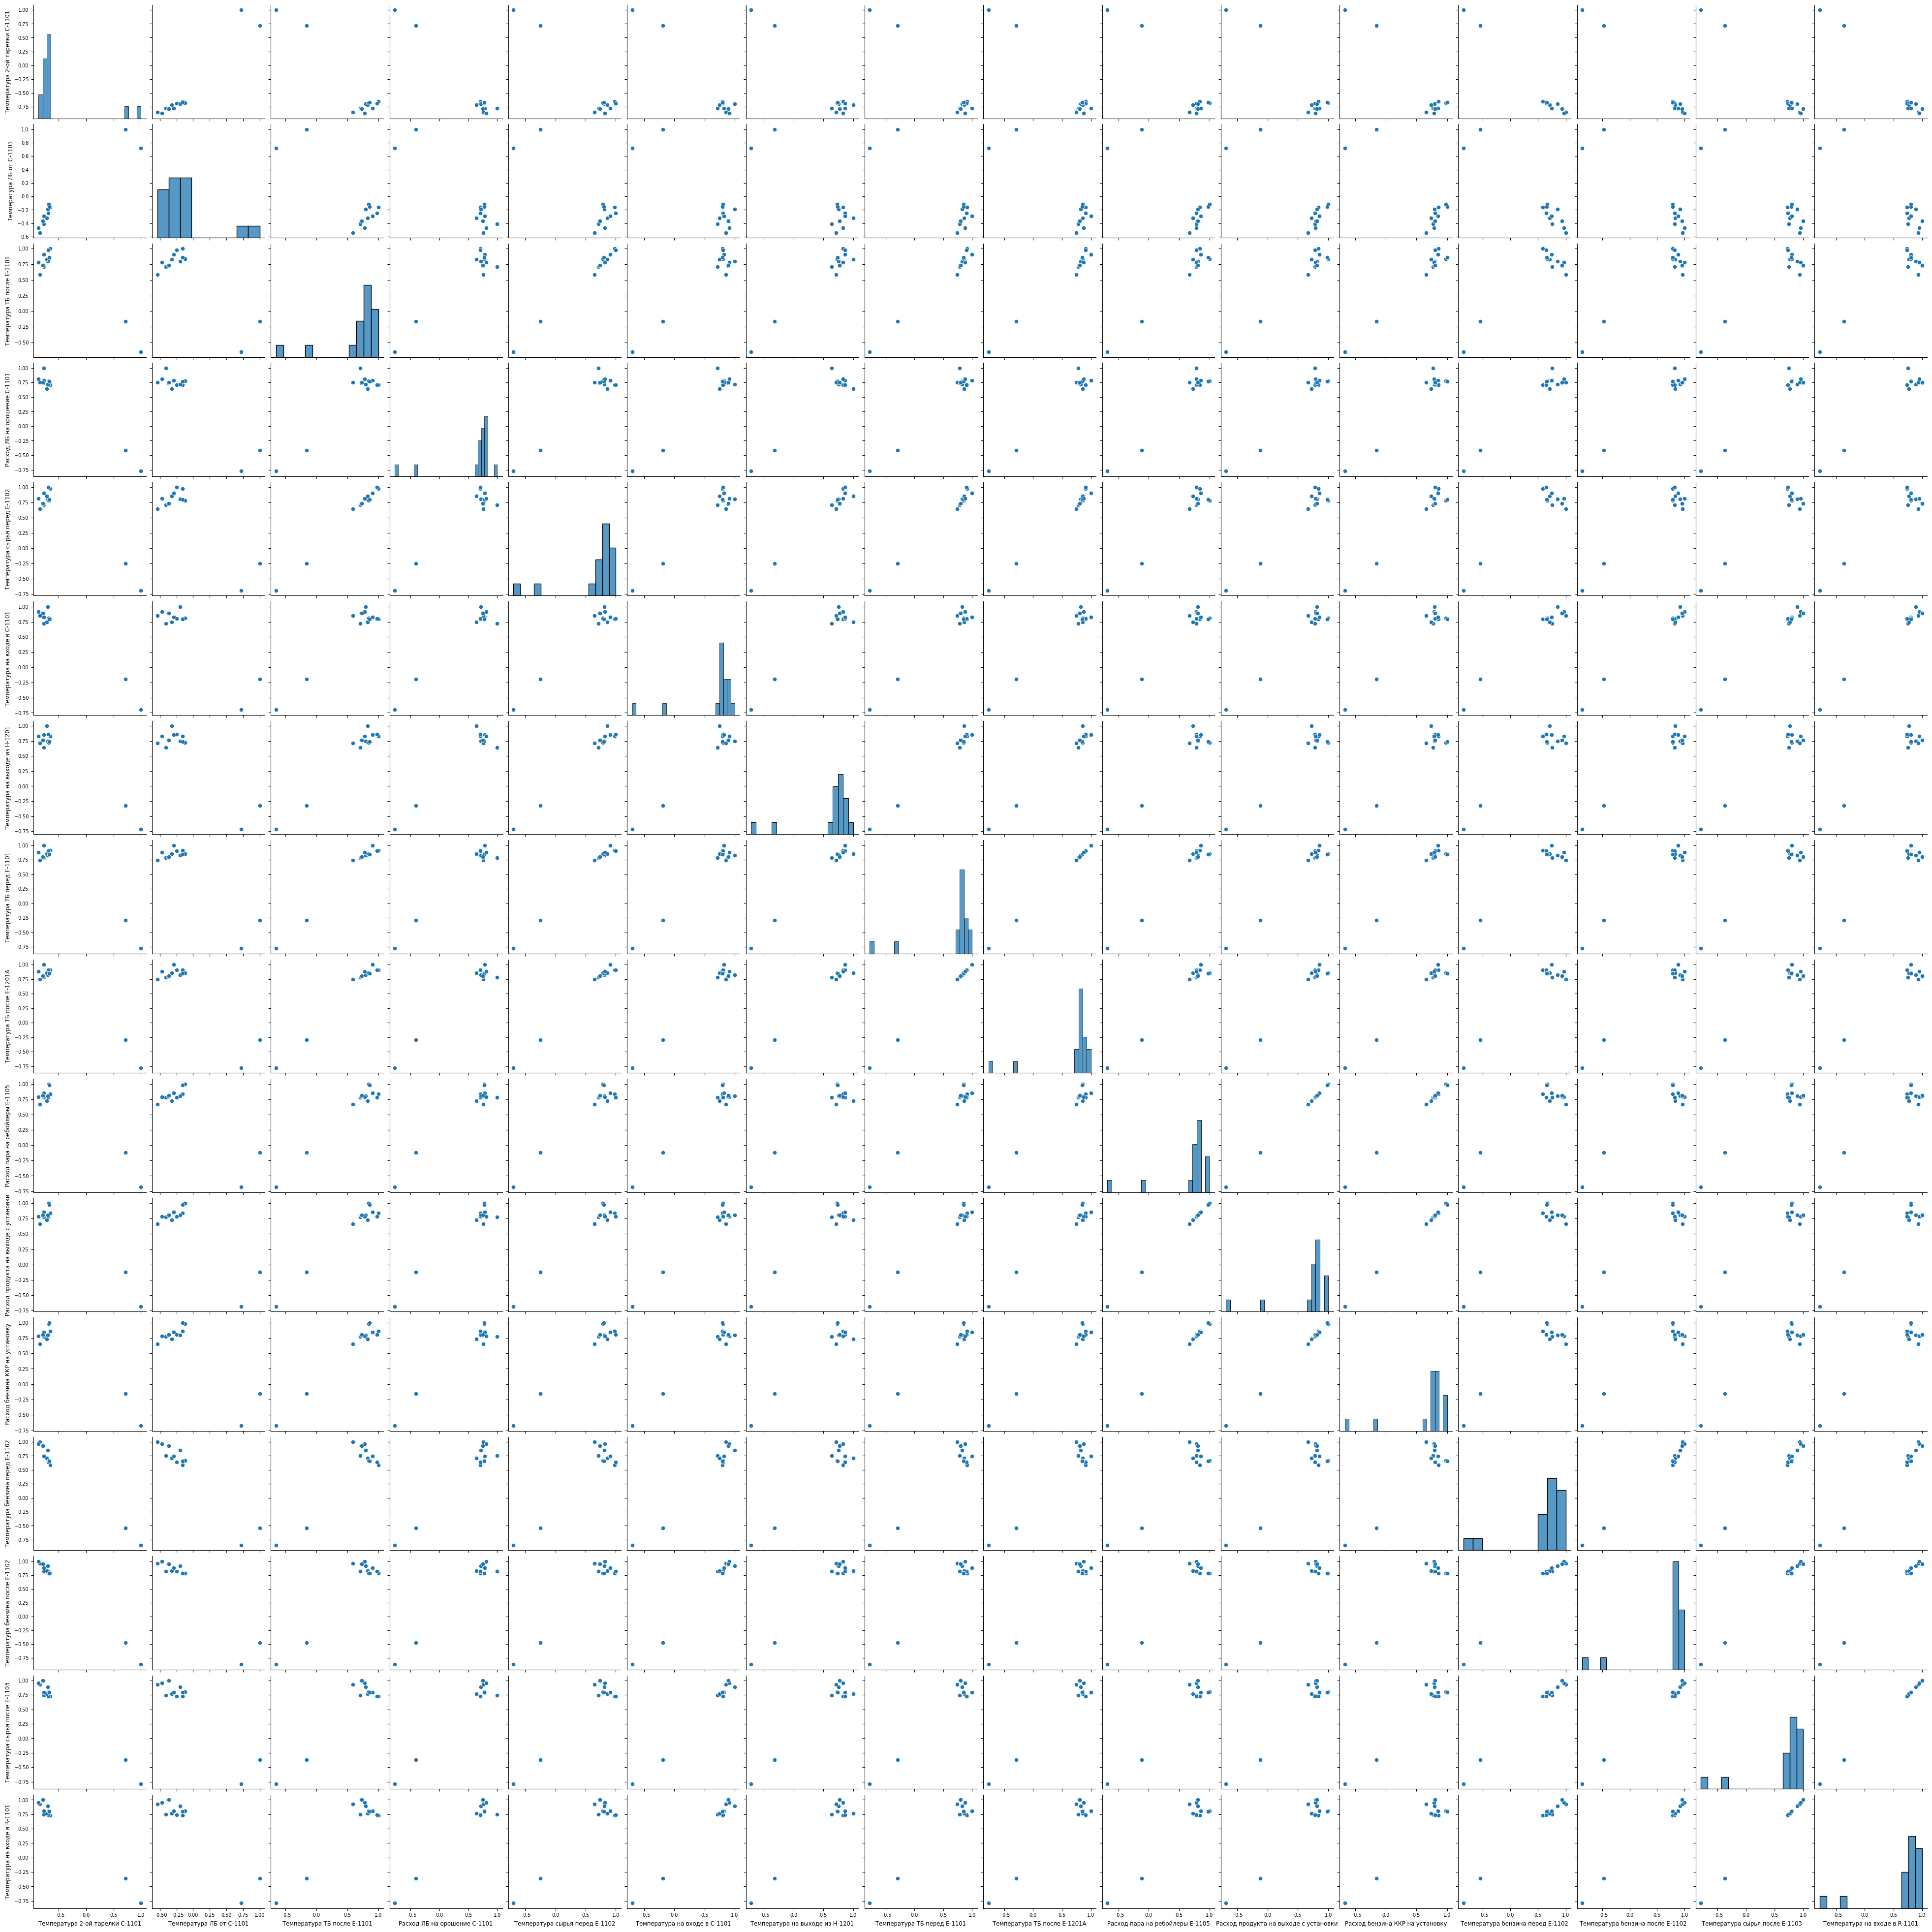

In [178]:
plt.rcParams['axes.labelsize'] = 'small'
plt.rcParams['xtick.labelsize'] = 'x-small'
plt.rcParams['ytick.labelsize'] = 'x-small'
sns.pairplot(test_viz.Cross_Corr(), height = 2.5)

In [179]:
#cross_corr_graph(test_viz.Cross_Corr(threshhold))